In [57]:
import keras
from keras.datasets import imdb
import matplotlib.pyplot as plt
from keras import preprocessing

In [58]:
max_feature=10000  # maimum words vocab size
max_len=40  #number of vocan words per review

In [59]:
(x_train_,y_train),(x_test_,y_test)=imdb.load_data(num_words=max_feature)

In [60]:
print(len(x_train[0]))

20


In [61]:
print(x_train_[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [62]:
y_train_[0]

1

In [63]:
print(len(x_train_),len(x_test_))

25000 25000


In [64]:
#This is with 'pre' padding and back of the list is used
#     if truncating == 'pre':
#       trunc = s[-maxlen:]  # pylint: disable=invalid-unary-operand-type
#     elif truncating == 'post':
#       trunc = s[:maxlen]


x_train=preprocessing.sequence.pad_sequences(x_train_,maxlen=max_len)

In [65]:
x_test=preprocessing.sequence.pad_sequences(x_test_,maxlen=max_len)

In [66]:
x_train[0]

array([  22,   21,  134,  476,   26,  480,    5,  144,   30, 5535,   18,
         51,   36,   28,  224,   92,   25,  104,    4,  226,   65,   16,
         38, 1334,   88,   12,   16,  283,    5,   16, 4472,  113,  103,
         32,   15,   16, 5345,   19,  178,   32], dtype=int32)

In [67]:
x_train.shape

(25000, 40)

In [68]:
x_train[1]   #this is back of the list of 20 words not front of list!

array([ 152,  491,   18,    2,   32, 7464, 1212,   14,    9,    6,  371,
         78,   22,  625,   64, 1382,    9,    8,  168,  145,   23,    4,
       1690,   15,   16,    4, 1355,    5,   28,    6,   52,  154,  462,
         33,   89,   78,  285,   16,  145,   95], dtype=int32)

In [69]:
print(x_train_[1])

[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 8255, 2, 349, 2637, 148, 605, 2, 8003, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 2, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]


In [94]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Embedding,Dropout


model=Sequential()
model.add(Embedding(max_feature,8,input_length=max_len)) #dense layer 8 => sample * max_len*8
model.add(Flatten())
#model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 40, 8)             80000     
_________________________________________________________________
flatten_11 (Flatten)         (None, 320)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 320)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 321       
Total params: 80,321
Trainable params: 80,321
Non-trainable params: 0
_________________________________________________________________


In [95]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [96]:
history=model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 3s 166us/step - loss: 0.6760 - acc: 0.5932 - val_loss: 0.6191 - val_acc: 0.7268
Epoch 2/10
20000/20000 [==============================] - 3s 173us/step - loss: 0.5160 - acc: 0.7730 - val_loss: 0.4710 - val_acc: 0.7786
Epoch 3/10
20000/20000 [==============================] - 3s 169us/step - loss: 0.4065 - acc: 0.8249 - val_loss: 0.4364 - val_acc: 0.7958
Epoch 4/10
20000/20000 [==============================] - 3s 172us/step - loss: 0.3525 - acc: 0.8533 - val_loss: 0.4276 - val_acc: 0.7972
Epoch 5/10
20000/20000 [==============================] - 3s 163us/step - loss: 0.3157 - acc: 0.8704 - val_loss: 0.4259 - val_acc: 0.7930
Epoch 6/10
20000/20000 [==============================] - 3s 174us/step - loss: 0.2853 - acc: 0.8830 - val_loss: 0.4290 - val_acc: 0.7942
Epoch 7/10
20000/20000 [==============================] - 3s 171us/step - loss: 0.2645 - acc: 0.8974 - val_loss: 0.4383 - v

In [97]:
model.evaluate(x_test,y_test)

25000/25000 [==============================] - 1s 43us/step


[0.45148554295539856, 0.79688]

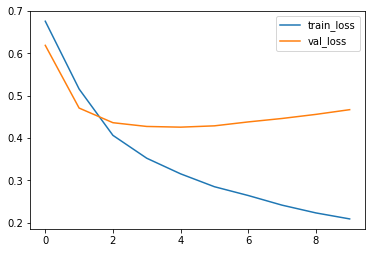

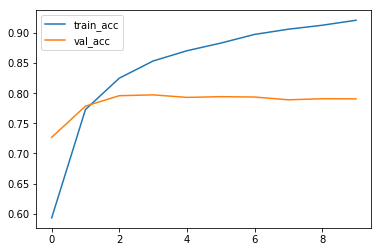

In [98]:
import matplotlib.pyplot as plt
import numpy  as np
list_epoch=np.arange(0,10)
plt.plot(list_epoch,history.history['loss'])

plt.plot(list_epoch,history.history['val_loss'])

plt.legend(['train_loss','val_loss'])
plt.show()


plt.plot(list_epoch,history.history['acc'])

plt.plot(list_epoch,history.history['val_acc'])
plt.legend(['train_acc','val_acc'])
plt.show()